<a href="https://colab.research.google.com/github/Emersonmiady/amazon-br/blob/main/queimadas_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Um Brasil em chamas
A __queimada__ é um processo de queima da biomassa que pode ocorrer tanto por fatores naturais como por práticas humanas. O processo humano é aplicado pelo mundo inteiro, e no caso do Brasil, justamente por ser de baixo custo, é bastante utilizado por pequenos agricultores, afim de limpar uma área de cultivo rapidamente, renovar a pastagem ou facilitar a colheita de cana-de-açúcar.

As queimadas em território brasileiro já são matérias de jornais há muito tempo, alertando a população de que tal ato pode ter danos irreversíveis, afetando-se assim, o equilíbrio dos ecossistemas, a saúde humana e o planeta como um todo.

<center><img src='https://github.com/Emersonmiady/amazon-br/blob/main/img/wildfire.jpg?raw=true' width='800' height='450'></center>

Enfim, o meu objetivo é realizar uma análise simples dos dados em relação a essas queimadas, descobrir como foi o progresso delas em um determinado período. A inspiração é por pura curiosidade pessoal, e quem sabe, mudar a mente de algumas pessoas futuramente.

## Descrição dos dados
Obtive um *dataset* do [*Kaggle*](https://https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil), o qual pode ser obtido também pelo [*site* do governo](http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif). Os dados tratam das queimadas florestais no território brasileiro, por Estado, indo de 1998 a 2017.

In [14]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
# Importar os dados
url = 'https://raw.githubusercontent.com/Emersonmiady/amazon-br/main/dataset/amazon.csv'

wildfire = pd.read_csv(url, encoding='UTF-8', header=0, parse_dates=['date'])

### Dicionário das variáveis
Esse arquivo *csv* possui 5 colunas, sendo elas:
- __year:__ ano da ocorrência;
  - 1998 a 2017.
- __state:__ Estado brasileiro em que ocorreu;
  - 23 Estados.
- __month:__ mês da ocorrência;
  - 12 meses.
- __number:__ número reportado de queimadas em florestas;
- __date:__ data da ocorrência.

## Análise Exploratória de Dados
Como se pode observar abaixo, esse arquivo possui 6454 linhas e 5 colunas. Além disso, podemos agrupar os dados por data, mês, ano e Estado.

Uma prática recomendada, antes de iniciarmos a exploração de fato, é conferir se existem dados faltantes nesse *Dataframe*. Os dados faltantes podem acabar interferindo na análise, tendo que substituí-los assim, por algum outro valor, ou até mesmo retirar a coluna, caso haja uma quantidade elevada deles. De acordo com as próximas linhas de código, não existem dados faltantes, então nenhuma manipulação será necessária.

In [16]:
# Ver o formato do Dataframe
print('Formato do Dataframe:', wildfire.shape)

# Descobrir se existem dados faltantes
print('Existem', wildfire['number'].isnull().sum(), 'dados faltantes')

# Ver as 5 primeiras linhas
wildfire.head()

Formato do Dataframe: (6454, 5)
Existem 0 dados faltantes


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [17]:
# Exibir estatísticas
wildfire['number'].describe().reset_index()

,index,number
0,count,6454.000000
1,mean,108.293163
2,std,190.812242
3,min,0.000000
4,25%,3.000000
5,50%,24.000000
6,75%,113.000000
7,max,998.000000


Algumas observações:
- A média está muito acima da mediana, sendo assim, alguns dados estão tendenciando o centro para valores maiores;
- Aos 75% dos dados, 113 é o número de ocorrências, entretanto, o valor máximo é de 998 casos, sendo uma distância enorme entre esses valores;
- A alta variabilidade entre os dados pode ser confirmada a partir do alto desvio padrão (*std*).

Vou agora exibir o histograma, o boxplot e o violinplot, para ter uma melhor noção da dispersão desses dados:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


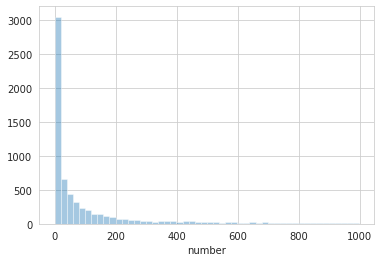

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


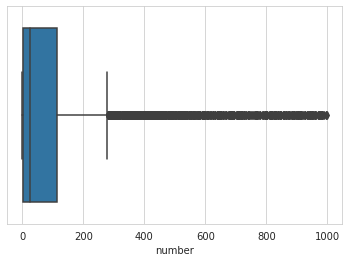

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


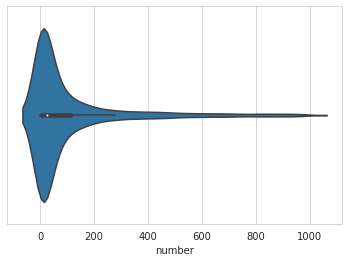

In [18]:
# Selecionar um estilo
sns.set_style('whitegrid')

# Exibir histograma
sns.distplot(wildfire['number'], kde=False)
plt.show()

# Exibir boxplot
sns.boxplot('number', data=wildfire)
plt.show()

# Exibir violinplot
sns.violinplot('number', data=wildfire)
plt.show()

Como se pode perceber acima, existem __muitos__ *outliers*, puxando a média para a direita, e também, esticando a cauda do histograma para o mesmo lado. Além disso, há uma concentração, em quantidade, dos números antes de 200.

A interpretação de tudo isso é que, aconteceram, de maneira concentrada, queimadas com poucas ocorrências diárias, e uma grande variação no número de queimadas por dia, durante o passar desses anos.

### Análise temporal
Agrupando os dados por:
- __ano:__ observamos que em 2003 houve o maior pico dos casos de queimada, e em 2016, também atingiu um valor bem considerável. Além de que o número de queimadas vem apresentando uma tendência de crescimento, conforme se passam os anos;
- __mês:__ nota-se que os meses que mais tiveram queimadas foram Julho, Outubro, Agosto e Novembro, durante o período analisado. Ou seja, a maior parte das ocorrências é no segundo semestre.



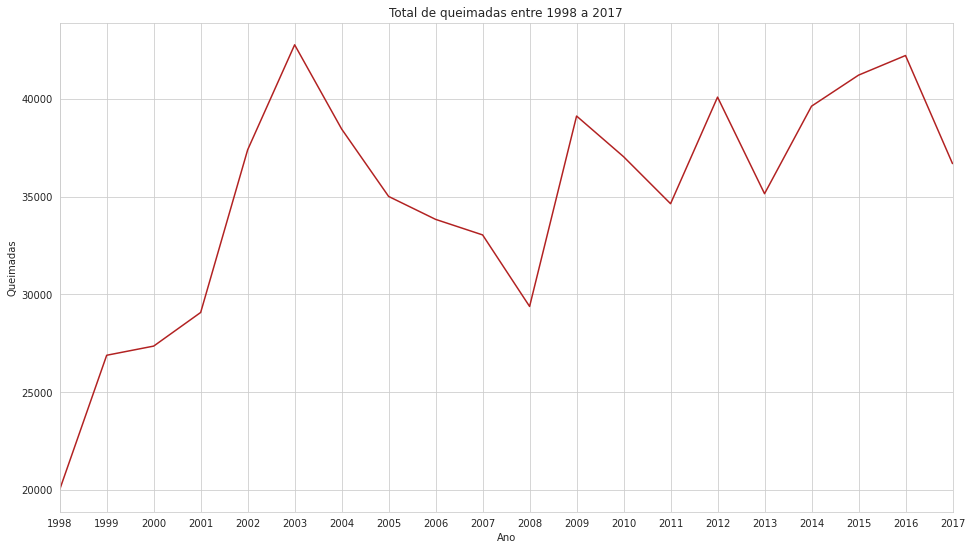

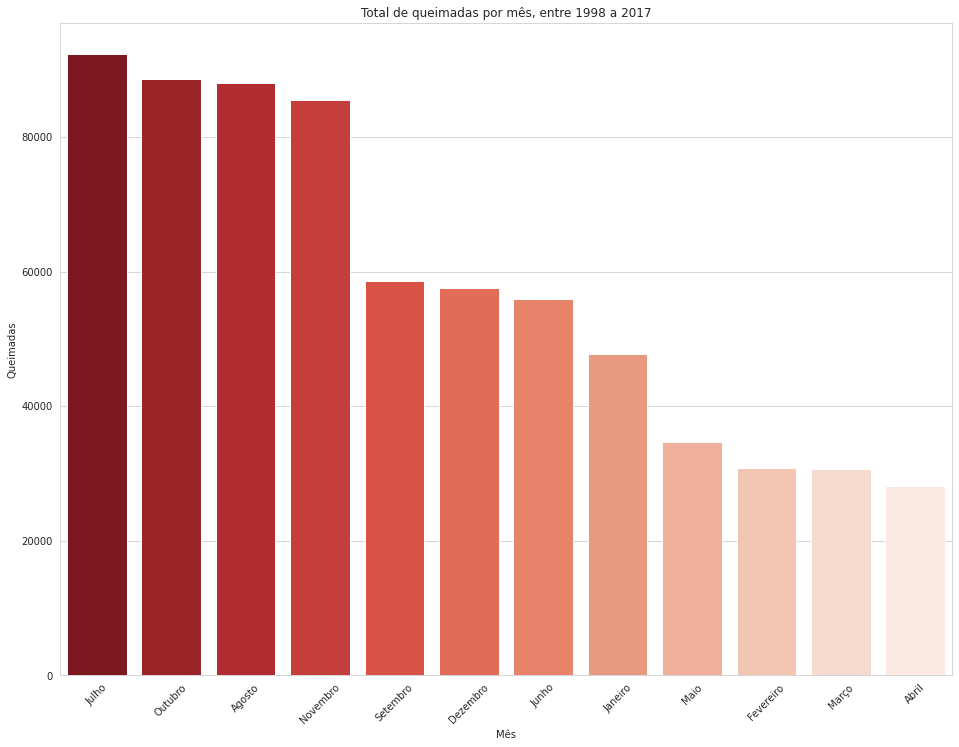

In [19]:
# Exibir gráfico de linhas por ano
plt.figure(figsize=(16,9))
ax = sns.lineplot(x='year', y='number', estimator='sum', data=wildfire, err_style=None, color='firebrick')
plt.xticks(ticks=wildfire['year'].unique())
plt.xlabel('Ano')
plt.ylabel('Queimadas')
plt.title('Total de queimadas entre 1998 a 2017')
ax.set_xlim(1998, 2017)
plt.show()

# Exibir gráfico de barras por mês
plt.figure(figsize=(16,12))
sorted_number = wildfire.groupby('month')['number'].sum().sort_values(ascending=False)
sns.barplot(x=sorted_number.index, y=sorted_number, ci=None, palette='Reds_r')
plt.xticks(rotation=45)
plt.xlabel('Mês')
plt.ylabel('Queimadas')
plt.title('Total de queimadas por mês, entre 1998 a 2017')
plt.show()

### Análise por Estado
Abaixo, mostrarei como ficaram os números por Estado, em relação ao período proposto. O pódio é composto por Mato Grosso, seguido por Paraíba e São Paulo, com o primeiro se destacando muito em relação aos outros dois. É possível notar que o número do Mato Grosso é quase o dobro do segundo e do terceiro lugar.

Text(0.5, 1.0, 'Total de queimadas por Estado, entre 1998 a 2017')

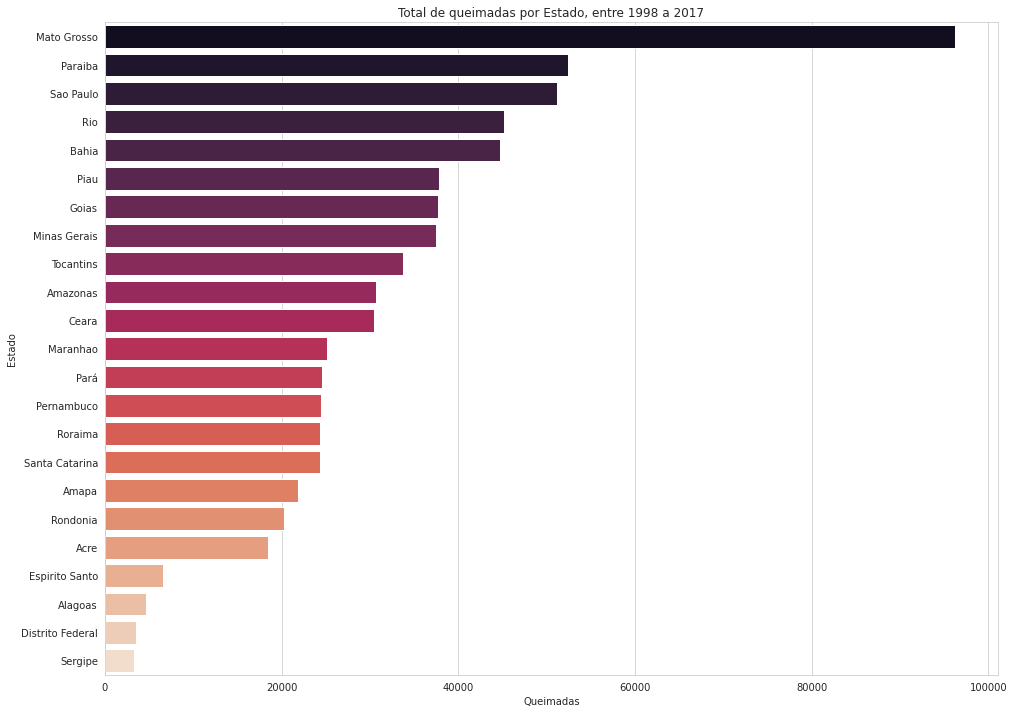

In [20]:
# Exibir gráfico de barras por Estado
plt.figure(figsize=(16,12))
wildfire_10 = wildfire.groupby('state')['number'].sum().sort_values(ascending=False)
sns.barplot(x=wildfire_10, y=wildfire_10.index, palette='rocket', orient='h')
plt.xlabel('Queimadas')
plt.ylabel('Estado')
plt.title('Total de queimadas por Estado, entre 1998 a 2017')

Eu não não sei as exatas localizações dos biomas no território brasileiro. Logo, para responder essa questão, extraí uma imagem do site do Instituto Brasileiro de Geografia e Estatística (IBGE), na qual pode ser encontrada [nesse endereço](https://educa.ibge.gov.br/jovens/conheca-o-brasil/territorio/18307-biomas-brasileiros.html.). Infelizmente, não existe uma separação das queimadas por vegetação no dataset escolhido, mas essas informações abaixo servem só para termos uma noção, de quais biomas estão presentes nos Estados do país e que podem ter sido afetados.

<center><img src='https://github.com/Emersonmiady/amazon-br/blob/main/img/biomas_e_sistema_costeiro_marinho_250mil-1.png?raw=true' width='800'></center>

### Análise da Amazônia
Muito se houve na mídia que, as queimadas na Amazônia vêm aumentando conforme o passar dos anos. Para finalizar essa análise exploratória, e por estímulo da minha curiosidade, verei se isso é realmente verdade. 

Lembrando que os Estados com o bioma "Amazônia" são: Acre, Amapá, Pará, Amazonas, Rondonia, Roraima, e partes do Mato Grosso, Tocantins, e Maranhão.

__Observação:__ não sabemos se foi somente a Amazônia afetada, nesses últimos 3 Estados citados acima, mas é o que temos para fazer a análise.

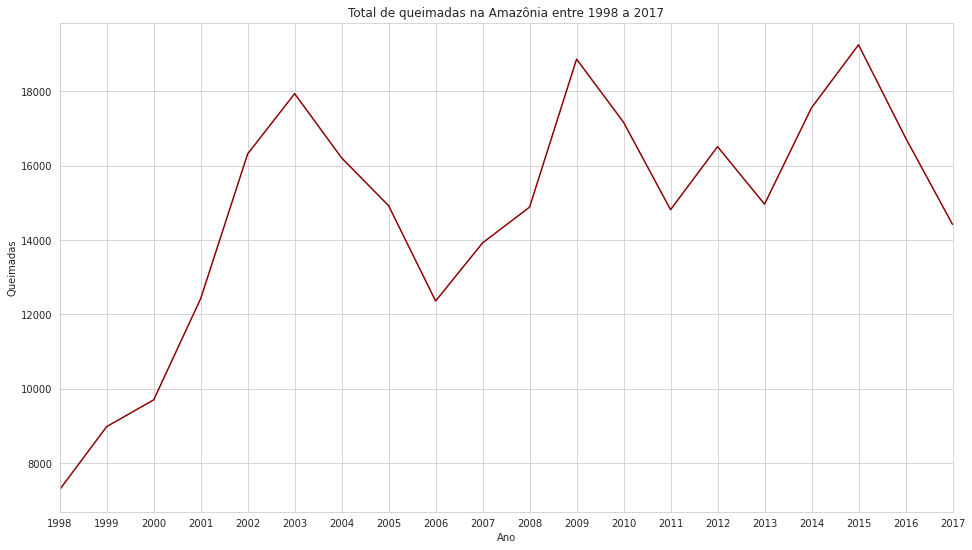

In [21]:
# Exibir gráfico de linhas dos Estados que possuem a Amazônia
amazon = wildfire[wildfire['state'].isin(['Acre', 'Amapa', 'Pará', 
                                          'Amazonas', 'Rondonia', 'Roraima', 
                                          'Mato Grosso', 'Tocantins', 'Maranhao'])]
amazon_year = amazon.groupby('year')['number'].sum()

plt.figure(figsize=(16, 9))
ax_amazon = sns.lineplot(x=amazon_year.index, y=amazon_year, err_style=None, color='darkred')
plt.xticks(ticks=amazon['year'].unique())
ax_amazon.set_xlim(1998,2017)
plt.xlabel('Ano')
plt.ylabel('Queimadas')
plt.title('Total de queimadas na Amazônia entre 1998 a 2017')
plt.show()

Pode-se perceber que sim, a quantidade de queimadas vem crescendo nesses últimos tempos, e aparentemente, vem apresentando uma certa instabilidade, ou seja, a linha vai muito pra cima e para baixo, sem ter valores tão diferentes, mas que permanecem altos.

O dataset, infelizmente, apresenta dados até 2017, sendo que essa análise está sendo feita em 2020, mas é o que foi fornecido pelo Kaggle.

## Conclusão
As análises acima só vêm confirmando o que as redes de comunicações relataram nesses últimos anos. O número de queimadas, não só da Amazônia, mas de outros biomas brasileiros, também chamam a atenção.

Acho que já está na hora das pessoas pensarem mais no meio ambiente, não somente com a evasão das chamas, mas a cada dia fazendo a sua parte, criando uma educação ambiental para evitar problemas para as futuras gerações.

Enfim, foi gratificante trabalhar com esse conjunto de dados, com eles eu pude sanar algumas curiosidades minhas e quem sabe, mudar a mente de alguém! :)

Muito Obrigado!



